In [1]:
import matplotlib.pyplot as plt
import cmasher as cmr
import numpy as np
from unyt import Myr, K


In [2]:
# set style
plt.style.use('../../matplotlibrc.txt')

### Read in Galaxy object

In [3]:
import pickle

# Define object ID
id = '145492'

# Initialise Galaxy object
galaxy = pickle.load(open(f'data/galaxy_{id}.pck','rb'))

### Initialise a SPS grid

In [29]:
from synthesizer.grid import Grid

grid_dir = '/Users/sw376/Dropbox/Research/data/synthesizer/grids/'
grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0_cloudy-c23.01-sps'

# initialise the grid, but with a restricted wavelength range and resolution
grid = Grid(grid_name, grid_dir=grid_dir)

### Create the incident (pure stellar) spectra

/Users/sw376/Dropbox/Research/projects/synthesizer-lines/venv/lib/python3.10/site-packages/unyt/array.py:1813: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


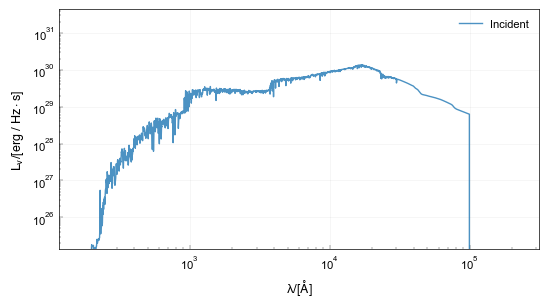

In [30]:
from synthesizer.emission_models import IncidentEmission

# reset spectra
galaxy.stars.spectra = {}

# generate integrated spectra
galaxy.stars.get_spectra(IncidentEmission(grid=grid))

# plot spectra
fig, ax = galaxy.stars.plot_spectra(show=True, figsize=(6, 4))

### Create dust attenuated spectra

/Users/sw376/Dropbox/Research/projects/synthesizer-lines/venv/lib/python3.10/site-packages/unyt/array.py:1813: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


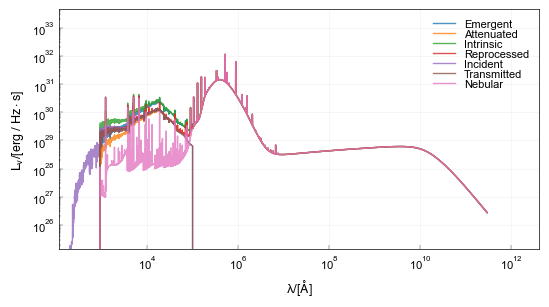

In [34]:
from synthesizer.emission_models import PacmanEmission
from synthesizer.emission_models.attenuation import PowerLaw

# specify a power-law dust curve
alpha = -1.0 # dust curve slope
dust_curve = PowerLaw(slope=alpha)

screen = PacmanEmission(
    grid=grid, 
    tau_v=0.5, 
    dust_curve=dust_curve
    )

galaxy.stars.spectra = {} # reset spectra
galaxy.stars.get_spectra(screen)
spectra = galaxy.stars.spectra
fig, ax = galaxy.stars.plot_spectra(show=True, figsize=(6, 4))

### Make production figure

/Users/sw376/Dropbox/Research/projects/synthesizer-lines/venv/lib/python3.10/site-packages/unyt/array.py:1813: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


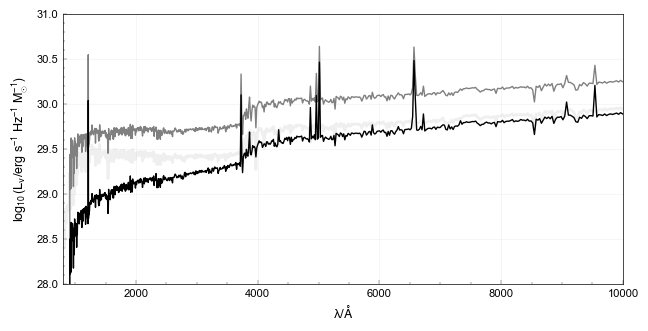

In [36]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from synthesizer.grid import Grid
import cmasher as cmr


wavelength_limits = [800, 10000]
luminosity_limits = [28., 31.]


# set style
plt.style.use('../../matplotlibrc.txt')


fig = plt.figure(figsize=(7.0, 4.5))

left = 0.15
width = 0.8
bottom = 0.1
height = 0.6

ax = fig.add_axes((left, bottom, width, height))


reference_metallicity = 0.01

grid_point = (0, 5)

sed = spectra['incident']
ax.plot(sed.lam, np.log10(sed.lnu), lw=2, c='0.8', alpha=0.3)

sed = spectra['intrinsic']
ax.plot(sed.lam, np.log10(sed.lnu), lw=1, c='0.5', alpha=1.0)

sed = spectra['attenuated']
ax.plot(sed.lam, np.log10(sed.lnu), lw=1, c='k', alpha=1.0)


ax.set_xlim(wavelength_limits)
ax.set_ylim(luminosity_limits)

ax.set_ylabel(r'$\rm \log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1}\ M_{\odot}^{-1})$')
ax.set_xlabel(r'$\rm \lambda/\AA$')

fig.savefig(f'figs/tng_spectra.pdf')
plt.show()
fig.clf()